<a href="https://colab.research.google.com/github/najoua-elmansouf/ProblemSolving/blob/main/ProblemSolving_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet
import numpy as np

In [2]:
dataset_path = '/content/student_data.csv'
student_df = pd.read_csv(dataset_path)

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
print(student_df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [5]:
student_df.columns.tolist()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

Cette table contient 33 colonnes

In [6]:
numerical_features = student_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numerical_features)
print(len(numerical_features))

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
16


On a 16 variables numériques et 14 variables catégoriques

In [ ]:
print(student_df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [ ]:
print("Le nombre de valeurs manquantes est : ")
print(student_df.isnull().sum().sum())

Le nombre de valeurs manquantes est : 
0


On n'a pas de valeurs manquantes

In [ ]:
student_df = student_df.drop(columns=['school'])
print(student_df.columns.tolist())



['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'traveltime', 'studytime', 'failures', 'famsup', 'activities', 'internet', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G3']


In [ ]:
print("La table contient maintenant ",len(student_df.columns.tolist()), " colonnes")
numerical_features = student_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = student_df.select_dtypes(include='object').columns.tolist()
print(numerical_features)
print("On a ",len(numerical_features)," variables numériques")
print(categorical_features)
print("On a ",len(categorical_features)," variables catégoriques")

La table contient maintenant  22  colonnes
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G3']
On a  12  variables numériques
['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'famsup', 'activities', 'internet']
On a  10  variables catégoriques


On a enlevé 8 variables qui n'ont pas de relation avec le contexte de notre étude. La table contient maintenant 12 variables numériques et 10 variables catégoriques.

# Transformation des variables catégoriques en des variables numériques

In [ ]:
encoder = OneHotEncoder()

numerical_features_df = student_df.select_dtypes(include=['float64', 'int64'])
categorical_features_df = student_df.select_dtypes(include='object')

#application du onehotencoder afin de transformer les variables categoriques en des variables numériques
categorical_tonumerical_features = encoder.fit_transform(categorical_features_df).toarray()
encoded_columns = encoder.get_feature_names_out(categorical_features_df.columns)

# Create a DataFrame from the transformed categorical features with proper column names
categorical_tonumerical_df = pd.DataFrame(categorical_tonumerical_features, columns=encoded_columns)

# Concatenate numerical and transformed categorical features
student_df_encoded = pd.concat([numerical_features_df, categorical_tonumerical_df], axis=1)
student_df_encoded.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,reason_course,reason_home,reason_other,reason_reputation,famsup_no,famsup_yes,activities_no,activities_yes,internet_no,internet_yes
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,3.554430,...,0.367089,0.275949,0.091139,0.265823,0.387342,0.612658,0.491139,0.508861,0.167089,0.832911
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,1.390303,...,0.482622,0.447558,0.288172,0.442331,0.487761,0.487761,0.500555,0.500555,0.373528,0.373528
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


La nouvelle table contient 40 variables numériques

In [ ]:
standarisation = StandardScaler()

student_data_standarise = pd.DataFrame(standarisation.fit_transform(student_df_encoded), columns=student_df_encoded.columns)


On a standarisé les données.

# Clustering hiérarchique

---






On va appliquer le clustering sur les variables en prenant comme critére de distance la corrélation entre les variables.

## Méthode average et métrique correlation

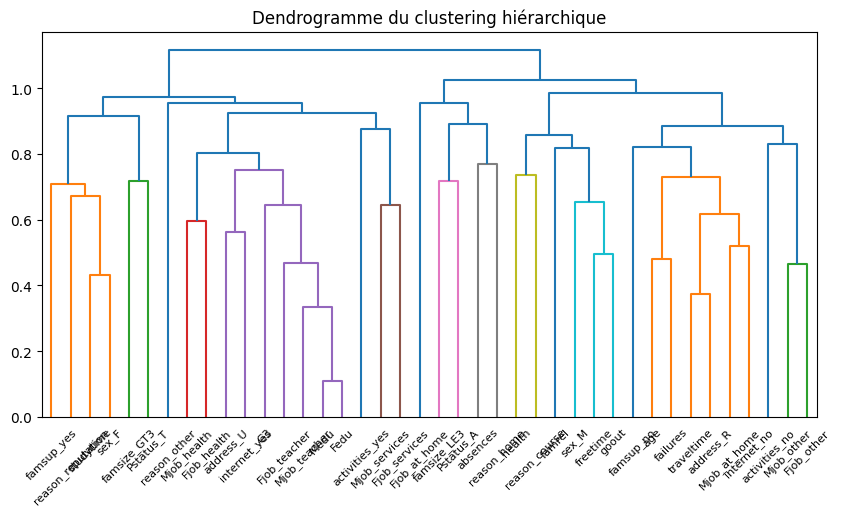

In [ ]:
correlation_matrix = student_data_standarise.corr()
Z = hierarchy.linkage(correlation_matrix, method='average', metric='correlation')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [ ]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(Z, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.49631687547232184


## Méthode single et métrique correlation





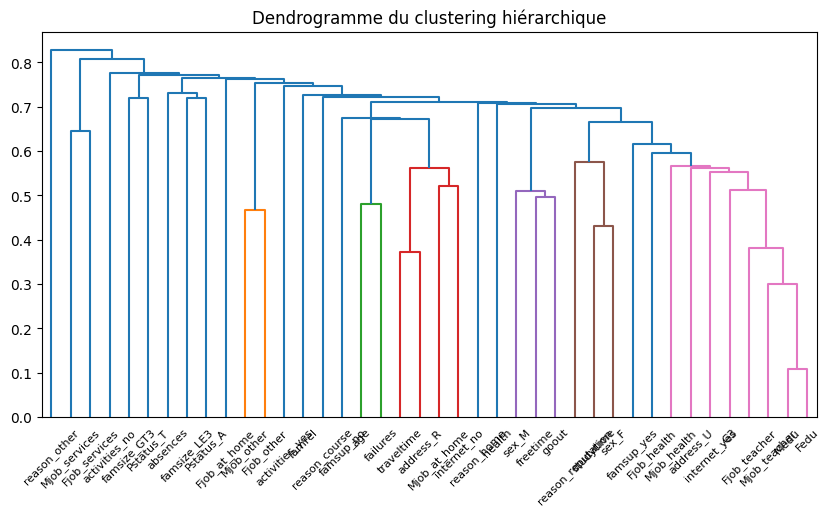

In [ ]:
S = hierarchy.linkage(correlation_matrix, method='single', metric='correlation')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(S, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()


In [ ]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(S, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.29232860999485033


## Méthode complete et métrique correlation

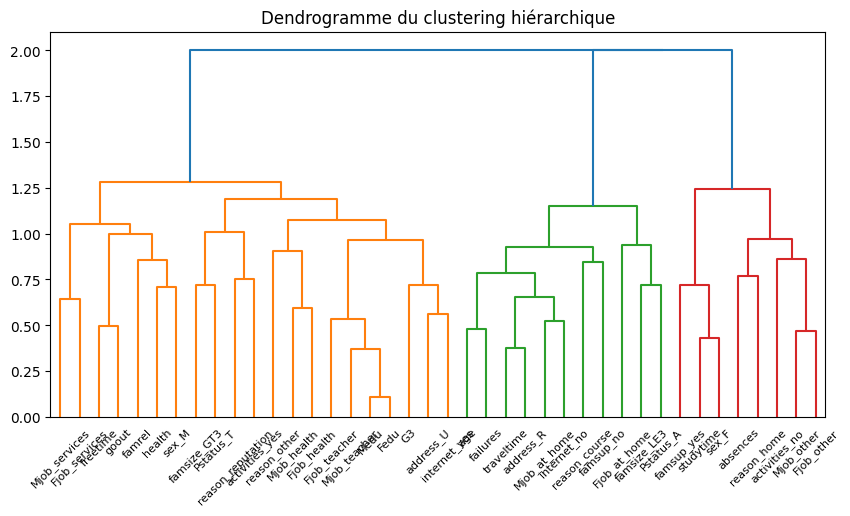

In [ ]:
C = hierarchy.linkage(correlation_matrix, method='complete', metric='correlation')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(C, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [ ]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(C, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.42761743060569835


## Méthode ward et métrique euclidienne

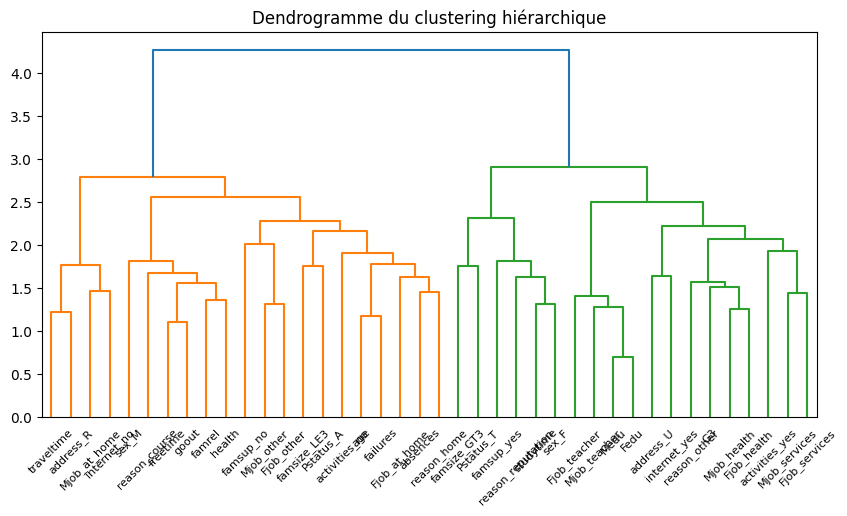

In [ ]:
W = hierarchy.linkage(correlation_matrix, method='ward', metric='euclidean')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(W, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [ ]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(W, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.44944527021197517


## Méthode average et métrique euclidiénne

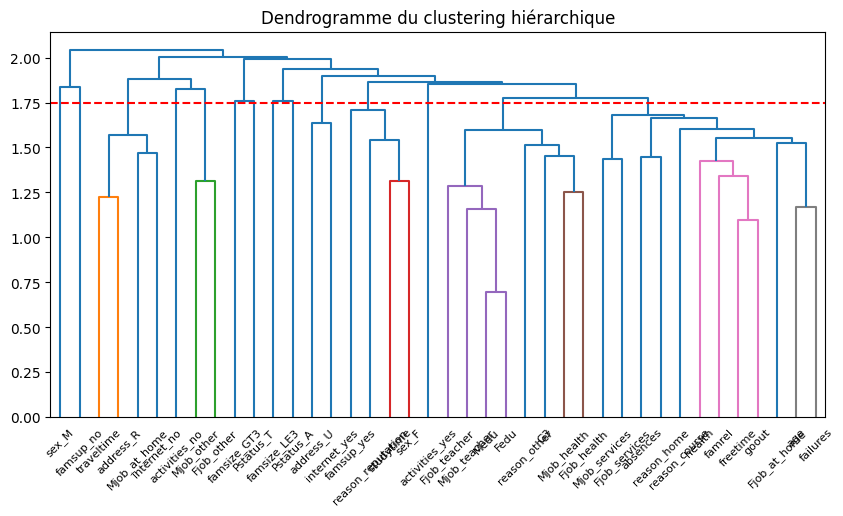

In [ ]:
correlation_matrix = student_data_standarise.corr()
Z = hierarchy.linkage(correlation_matrix, method='average', metric='euclidean')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.axhline(y= 1.75, color='r', linestyle='--')
plt.show()

In [ ]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(Z, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.6133357688397297


## Méthode average et métrique cosine

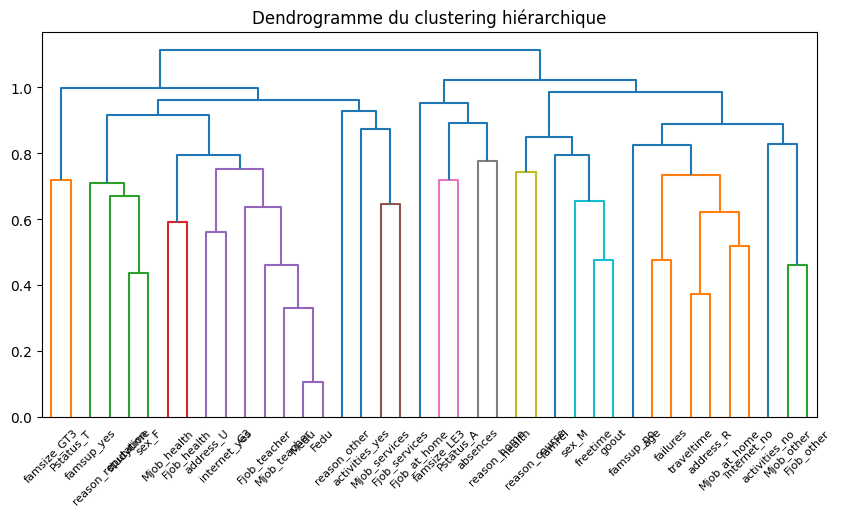

In [ ]:
correlation_matrix = student_data_standarise.corr()
Z = hierarchy.linkage(correlation_matrix, method='average', metric='cosine')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [ ]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(Z, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.5012669453103374


**Inteprétation des résultats :**

*   En utilisant la méthode average et la métrique euclidienne on a eu un coefficient cophénétique de 0.61, qui est la plus grande valeur de ce coefficient parmis toutes les combinaisons.
*   Cette valeur de ce coefficient montre que le clustering résultant de cette combinaison refléte bien la distance réelle entre les variables.
*   Le but de ce clustering est de trouver les variables qui sont les plus corrélées à la variable G3 qui représente la note des étudiants, ceci dit le résultat du clustering montre que :

  *   Le travail de la mére (Mjob)
  *   Le travail du pére (Fjob)
  *   L'éducation de la mére (Medu)
  *   L'éducation du pére (Fedu)
  *   La raison du choix de l'université (reason)
  *   L'absence (absences)
  *   La santé (health)
  *   La qualité de la relation avec la famille (famrel)
  *   Le temps libre (freetime)
  *   S'amuser (goout)

Ces variables sont celles qui affectent la note des étudiants.










# Analyse en Composantes Principales (ACP)


In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataset_path = '/content/student_data.csv'
student_df = pd.read_csv(dataset_path)

In [10]:
numeric_variables = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences']
student_df_numeric = student_df[numeric_variables]

In [11]:
# Calculer la matrice de corrélation
correlation_matrix = student_df_numeric.corr()

# Afficher la matrice de corrélation
print(correlation_matrix)


                Medu      Fedu  traveltime  studytime  failures    famrel  \
Medu        1.000000  0.623455   -0.171639   0.064944 -0.236680 -0.003914   
Fedu        0.623455  1.000000   -0.158194  -0.009175 -0.250408 -0.001370   
traveltime -0.171639 -0.158194    1.000000  -0.100909  0.092239 -0.016808   
studytime   0.064944 -0.009175   -0.100909   1.000000 -0.173563  0.039731   
failures   -0.236680 -0.250408    0.092239  -0.173563  1.000000 -0.044337   
famrel     -0.003914 -0.001370   -0.016808   0.039731 -0.044337  1.000000   
freetime    0.030891 -0.012846   -0.017025  -0.143198  0.091987  0.150701   
goout       0.064094  0.043105    0.028540  -0.063904  0.124561  0.064568   
health     -0.046878  0.014742    0.007501  -0.075616  0.065827  0.094056   
absences    0.100285  0.024473   -0.012944  -0.062700  0.063726 -0.044354   

            freetime     goout    health  absences  
Medu        0.030891  0.064094 -0.046878  0.100285  
Fedu       -0.012846  0.043105  0.014742  0.02

Interprétation de la matrice de corrélation:

Medu (Niveau d'éducation de la mère) et Fedu (Niveau d'éducation du père) :

Forte corrélation positive (0.6235) : Il existe une corrélation significative entre le niveau d'éducation de la mère et celui du père. Cela suggère que, en général, les individus dont la mère a un niveau d'éducation élevé ont également tendance à avoir un père avec un niveau d'éducation élevé.
Medu (Niveau d'éducation de la mère) et failures (Nombre d'échecs) :

Corrélation négative importante (-0.2367) : Il existe une corrélation négative significative entre le niveau d'éducation de la mère et le nombre d'échecs. Cela pourrait signifier que des niveaux d'éducation maternelle plus élevés sont associés à un nombre d'échecs moins élevé.
traveltime (Temps de trajet) et failures (Nombre d'échecs) :

Corrélation positive (0.0922) : Un temps de trajet plus long est légèrement corrélé à un nombre d'échecs plus élevé. Cependant, la corrélation n'est pas très forte.
studytime (Temps d'étude hebdomadaire) et failures (Nombre d'échecs) :

Corrélation négative importante (-0.1736) : Il existe une corrélation négative significative entre le temps d'étude hebdomadaire et le nombre d'échecs. Cela suggère que des niveaux plus élevés de temps d'étude sont associés à un nombre d'échecs moins élevé.
goout (Temps passé avec des amis) et freetime (Temps libre après l'école) :

Corrélation positive importante (0.2850) : Il existe une corrélation significative entre le temps passé avec des amis et le temps libre après l'école. Cela suggère que les étudiants qui passent plus de temps avec des amis ont tendance à avoir plus de temps libre.
freetime (Temps libre après l'école) et famrel (Qualité des relations familiales) :

Corrélation positive importante (0.1507) : Il existe une corrélation significative entre le temps libre après l'école et la qualité des relations familiales. Cela pourrait indiquer que des niveaux plus élevés de temps libre sont associés à de meilleures relations familiales.

Résumé Statistique des Variables Numériques

In [12]:
# Obtenir le résumé statistique
summary_stats_numeric = student_df_numeric.describe()

# Afficher le résumé statistique
print(summary_stats_numeric)


             Medu        Fedu  traveltime   studytime    failures      famrel  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     2.749367    2.521519    1.448101    2.035443    0.334177    3.944304   
std      1.094735    1.088201    0.697505    0.839240    0.743651    0.896659   
min      0.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
25%      2.000000    2.000000    1.000000    1.000000    0.000000    4.000000   
50%      3.000000    2.000000    1.000000    2.000000    0.000000    4.000000   
75%      4.000000    3.000000    2.000000    2.000000    0.000000    5.000000   
max      4.000000    4.000000    4.000000    4.000000    3.000000    5.000000   

         freetime       goout      health    absences  
count  395.000000  395.000000  395.000000  395.000000  
mean     3.235443    3.108861    3.554430    5.708861  
std      0.998862    1.113278    1.390303    8.003096  
min      1.000000    1.000000    1.000000    0

Test de significativité de la corrélation (p-value)

Analyse de la Corrélation entre les Variables et la Performance Académique (G3)

In [13]:
from scipy.stats import pearsonr

# Définir la variable cible
target_variable = 'G3'

# Calculer les corrélations et les p-values
correlation_results = {}
for variable in student_df_numeric.columns:
    corr, p_value = pearsonr(student_df_numeric[variable], student_df[target_variable])
    correlation_results[variable] = {'correlation': corr, 'p_value': p_value}

# Afficher les résultats
for variable, result in correlation_results.items():
    print(f"{variable}: Corrélation = {result['correlation']:.4f}, p-value = {result['p_value']:.4f}")


Medu: Corrélation = 0.2171, p-value = 0.0000
Fedu: Corrélation = 0.1525, p-value = 0.0024
traveltime: Corrélation = -0.1171, p-value = 0.0199
studytime: Corrélation = 0.0978, p-value = 0.0521
failures: Corrélation = -0.3604, p-value = 0.0000
famrel: Corrélation = 0.0514, p-value = 0.3086
freetime: Corrélation = 0.0113, p-value = 0.8227
goout: Corrélation = -0.1328, p-value = 0.0082
health: Corrélation = -0.0613, p-value = 0.2239
absences: Corrélation = 0.0342, p-value = 0.4973


Éducation des parents (Medu, Fedu) :

Corrélation positive significative : Les niveaux d'éducation de la mère (0.2171) et du père (0.1525) sont positivement corrélés avec la note finale ('G3'). Cela suggère que des niveaux d'éducation plus élevés des parents sont associés à des performances scolaires supérieures.
Temps de trajet (traveltime) :

Corrélation négative significative : Un temps de trajet plus long est légèrement négativement corrélé avec la note finale ('G3'). Cela suggère que les étudiants qui ont un temps de trajet plus court peuvent avoir de meilleures performances scolaires.
Temps d'étude (studytime) :

Corrélation positive : Un temps d'étude plus élevé est légèrement positivement corrélé avec la note finale ('G3'), bien que la corrélation ne soit pas statistiquement significative à un niveau de confiance de 95%.
Échecs précédents (failures) :

Corrélation négative significative : Le nombre d'échecs antérieurs (-0.3604) est fortement négativement corrélé avec la note finale ('G3'). Cela indique qu'un historique d'échecs est associé à des performances scolaires plus faibles.
Relations familiales (famrel) :

Corrélation positive : La qualité des relations familiales (famrel) n'est pas statistiquement significative à un niveau de confiance de 95% (p-value = 0.3086).
Temps libre (freetime) :

Corrélation non significative : Le temps libre (freetime) n'est pas statistiquement significativement corrélé avec la note finale ('G3').
Sorties avec des amis (goout) :

Corrélation négative significative : Le temps passé à sortir avec des amis (-0.1328) est négativement corrélé avec la note finale ('G3'). Cela suggère que plus de temps passé à sortir est associé à des performances scolaires plus faibles.
État de santé (health) :

Corrélation non significative : L'état de santé (health) n'est pas statistiquement significativement corrélé avec la note finale ('G3').

***Calcul des composantes principales***



In [14]:
# Importer les bibliothèques nécessaires
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardiser les variables numériques
scaler = StandardScaler()
student_df_numeric_standardized = scaler.fit_transform(student_df_numeric)

# Initialiser l'objet PCA
pca = PCA()

# Appliquer PCA aux données standardisées
principal_components = pca.fit_transform(student_df_numeric_standardized)

# Créer un DataFrame pour visualiser les composantes principales
pca_columns = [f"PC{i+1}" for i in range(student_df_numeric.shape[1])]
principal_df = pd.DataFrame(data=principal_components, columns=pca_columns)

# Afficher la variance expliquée par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :", explained_variance_ratio)

# Afficher la somme cumulative de la variance expliquée
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Somme cumulative de la variance expliquée :", cumulative_explained_variance)


Variance expliquée par chaque composante principale : [0.1880353  0.14659557 0.11829018 0.10343222 0.09614594 0.0918924
 0.08251991 0.07225168 0.06488368 0.03595312]
Somme cumulative de la variance expliquée : [0.1880353  0.33463087 0.45292105 0.55635326 0.6524992  0.7443916
 0.82691151 0.89916319 0.96404688 1.        ]


Les deux premières composantes principales expliquent ensemble environ 33.46% de la variance totale, tandis que les 6 premières composantes principales expliquent environ 74.43%. Cela suggère que l'utilisation des 6 premières composantes principales peut capturer une proportion significative de la variabilité des données.

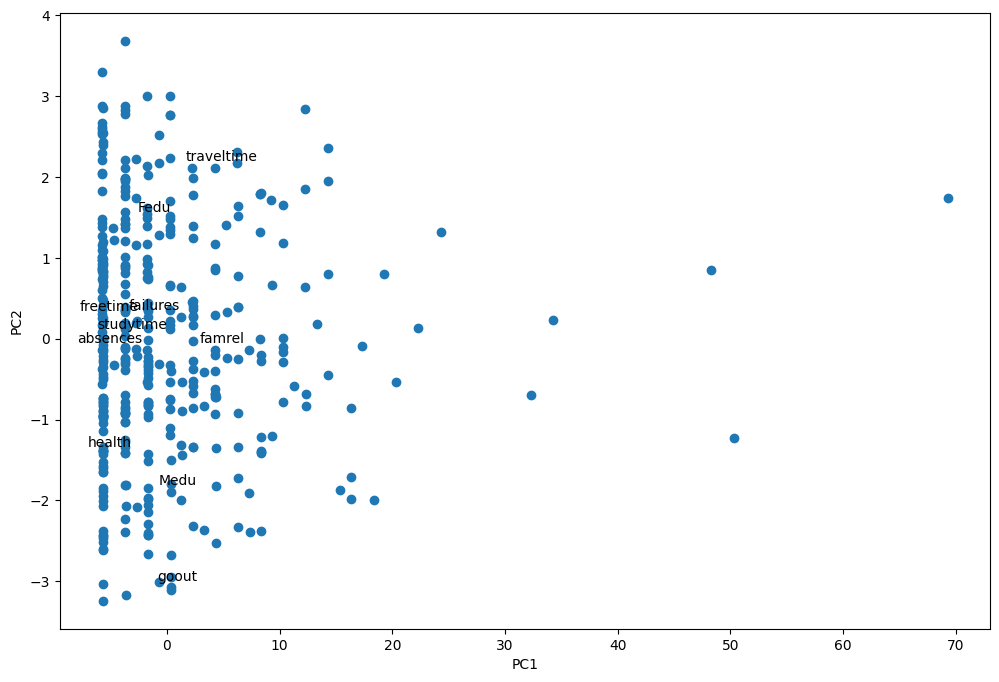

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# Supposons que vous avez déjà standardisé vos données et obtenu student_df_numeric

# Initialiser l'objet PCA
pca = PCA()

# Ajuster le modèle aux données
principal_components = pca.fit_transform(student_df_numeric)

# Créer un DataFrame pour les composantes principales
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
principal_df = pd.DataFrame(data=principal_components, columns=pca_columns)

# Afficher les représentations graphiques des variables
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(principal_df['PC1'], principal_df['PC2'])  # Vous pouvez ajuster PC1 et PC2 selon vos besoins

# Annoter chaque point avec le nom de la variable
for variable, (pc1, pc2) in zip(student_df_numeric.columns, principal_df[['PC1', 'PC2']].values):
    ax.annotate(variable, (pc1, pc2), textcoords="offset points", xytext=(5,5), ha='center')

# Ajouter des étiquettes aux axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Afficher le graphe
plt.show()


Les variables qui sont proches l'une de l'autre sur le graphique ont des structures similaires dans les données originales. Les points alignés indiquent une forte corrélation entre les deux variables correspondantes. De plus, les variables dont les points sont éloignés les uns des autres sur le graphique ont des structures différentes ou sont moins corrélées.

**Contribution des variables**

In [18]:
factor_loadings = pca.components_.T * (explained_variance_ratio ** 0.5)

# Créer un DataFrame pour les charges factorielles
loadings_df = pd.DataFrame(data=factor_loadings, columns=pca_columns, index=student_df_numeric.columns)

# Afficher les charges factorielles
print("Charges factorielles des variables sur les composantes principales :\n", loadings_df)

Charges factorielles des variables sur les composantes principales :
                  PC1       PC2       PC3       PC4       PC5       PC6  \
Medu        0.006071 -0.224970 -0.122683  0.008588 -0.004217  0.010211   
Fedu        0.001536 -0.212014 -0.137360  0.024923  0.023993  0.030189   
traveltime -0.000502  0.039038  0.020760 -0.011425  0.029954  0.016075   
studytime  -0.002874 -0.032049  0.018519  0.043853 -0.055804 -0.194471   
failures    0.002569  0.071744  0.017643 -0.046476  0.051248  0.047213   
famrel     -0.002192  0.017771 -0.037046 -0.043055 -0.237169 -0.094426   
freetime   -0.003175  0.019809 -0.054436 -0.174444 -0.130667  0.150858   
goout       0.002721 -0.015256 -0.043659 -0.249732  0.121166 -0.135366   
health     -0.002334  0.205846 -0.277568  0.062228  0.029981 -0.023916   
absences    0.433536  0.004748  0.000441  0.000752 -0.003420 -0.000452   

                 PC7       PC8       PC9      PC10  
Medu        0.030968  0.096355  0.102852 -0.089365  
Fedu     

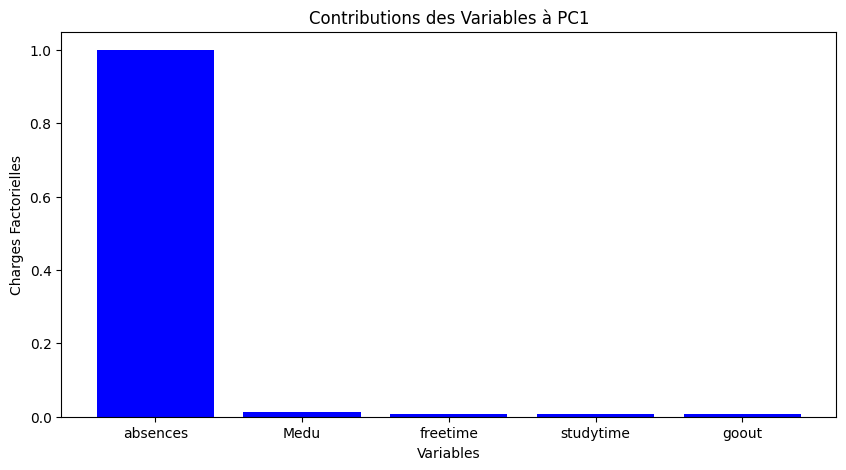

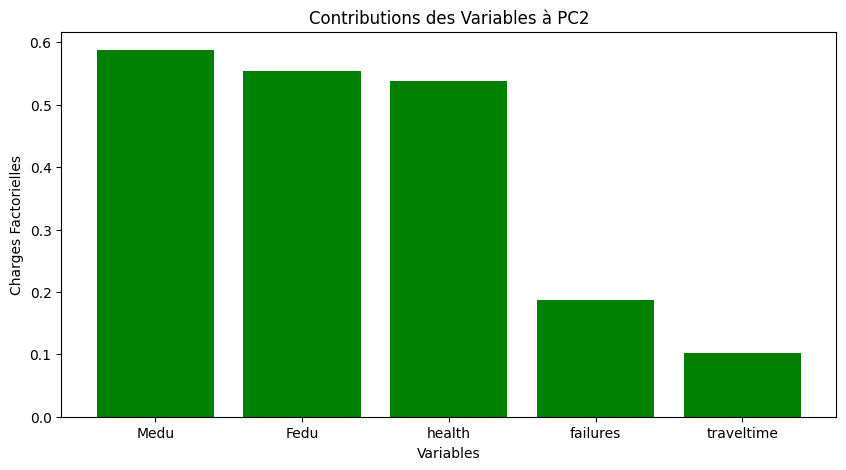

In [19]:
import matplotlib.pyplot as plt

# Charger les charges factorielles pour PC1 et PC2
pc_loadings = pca_df[['PC1', 'PC2']]

# Trier les variables par leur contribution à PC1
sorted_loadings_pc1 = pc_loadings['PC1'].abs().sort_values(ascending=False)

# Trier les variables par leur contribution à PC2
sorted_loadings_pc2 = pc_loadings['PC2'].abs().sort_values(ascending=False)

# Sélectionner les 5 variables les plus importantes pour PC1 et PC2
top_variables_pc1 = sorted_loadings_pc1.head(5)
top_variables_pc2 = sorted_loadings_pc2.head(5)

# Créer le bar plot pour PC1
plt.figure(figsize=(10, 5))
plt.bar(top_variables_pc1.index, top_variables_pc1, color='blue')
plt.title('Contributions des Variables à PC1')
plt.xlabel('Variables')
plt.ylabel('Charges Factorielles')
plt.show()

# Créer le bar plot pour PC2
plt.figure(figsize=(10, 5))
plt.bar(top_variables_pc2.index, top_variables_pc2, color='green')
plt.title('Contributions des Variables à PC2')
plt.xlabel('Variables')
plt.ylabel('Charges Factorielles')
plt.show()


**Cercle de correlation**

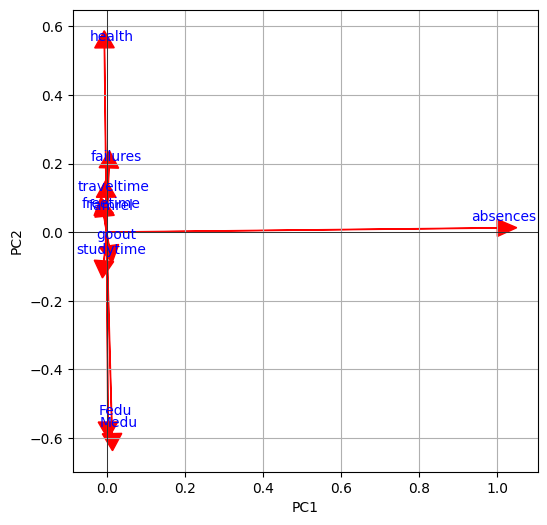

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supposons que vous avez déjà standardisé vos données et obtenu student_df_numeric

# Initialiser l'objet PCA
pca = PCA()

# Ajuster le modèle aux données
pca.fit(student_df_numeric)

# Obtenir les composantes principales
pca_components = pca.components_

# Créer un DataFrame pour les composantes principales
pca_columns = [f'PC{i+1}' for i in range(pca_components.shape[0])]
pca_df = pd.DataFrame(data=pca_components.T, columns=pca_columns, index=student_df_numeric.columns)

# Créer le cercle de corrélation
fig, ax = plt.subplots(figsize=(6, 6))

# Afficher les flèches représentant les variables originales
for variable in pca_df.index:
    ax.arrow(0, 0, pca_df.loc[variable, 'PC1'], pca_df.loc[variable, 'PC2'], head_width=0.05, head_length=0.05, fc='red', ec='red')
    ax.annotate(variable, (pca_df.loc[variable, 'PC1'], pca_df.loc[variable, 'PC2']), textcoords="offset points", xytext=(5,5), ha='center', color='blue')

# Ajouter des lignes de grille pour faciliter l'interprétation
ax.grid(True)
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)

# Ajouter des étiquettes aux axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Afficher le cercle de corrélation
plt.show()


**Interprétation générale des composantes principales :**

Absences (absences) : La variable d'absences a une charge factorielle significativement élevée sur PC1 (0.4335), indiquant une forte corrélation entre PC1 et le nombre d'absences. Cela suggère que des niveaux élevés d'absences sont associés à des valeurs élevées de PC1, qui est négativement corrélé avec le rendement scolaire. En d'autres termes, un nombre élevé d'absences est associé à des performances scolaires plus faibles.

Temps de trajet (traveltime) : Le temps de trajet a également une charge factorielle sur PC1 (-0.0005), bien que la corrélation soit très faible. Cependant, la négativité de la charge factorielle suggère que des temps de trajet plus longs sont associés à des valeurs plus basses de PC1, ce qui peut indiquer une légère tendance à des performances scolaires plus faibles.

En résumé, selon PC1, un nombre élevé d'absences semble avoir une influence négative plus forte sur le rendement scolaire que le temps de trajet.

PC2 (Deuxième composante principale) :

Medu (Éducation de la mère) : Bien que Medu ait une charge factorielle significativement négative sur PC2 (-0.225), ce composant principal n'a pas été interprété comme ayant une forte corrélation avec le rendement scolaire dans l'analyse précédente.